In [44]:
# Importações necessárias para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Exploratory Data Analysis

Importação, unificação e limpeza das Bases de Dados

In [45]:
# Carregar arquivo diretamente do diretório local
import os


In [46]:
import pandas as pd

# Carregar o arquivo diretamente do diretório de dados
ivs = pd.read_excel("../data/raw/Atlasvis_DadosBrutos.xlsx")

In [47]:
# Informações gerais do DataFrame
ivs.info()

# Ver quantos valores nulos existem por coluna
ivs.isnull().sum().sort_values(ascending=False)

# Ver um resumo estatístico das variáveis numéricas
ivs.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340786 entries, 0 to 340785
Columns: 103 entries, id to t_nremunerado_18m
dtypes: float64(2), int64(2), object(99)
memory usage: 267.8+ MB


,id,ano,ivs,idhm
count,340786.000000,340786.000000,140312.000000,277444.000000
mean,190671.979342,2005.582078,0.370811,0.608250
std,127660.960189,5.531609,0.137952,0.123754
min,1.000000,2000.000000,0.034000,0.000000
25%,95079.250000,2000.000000,0.266000,0.533000
50%,180275.500000,2010.000000,0.357000,0.620000
75%,265471.750000,2010.000000,0.467000,0.697000
max,660006.000000,2022.000000,0.872000,0.965000


Estrutura da base:

A base possui 340.786 observações (linhas) e 103 variáveis (colunas).

Entre essas variáveis, 99 estão no formato object, o que indica que seus valores estão armazenados como texto (muito provavelmente com vírgulas no lugar de pontos decimais), o que impede análises numéricas até que sejam convertidas.

Presença de valores ausentes:

Identificamos que várias variáveis importantes possuem muitos valores nulos (NaN).

Por exemplo:

A variável ivs (Índice de Vulnerabilidade Social) aparece em apenas 140.312 das 340.786 linhas.

A variável idhm (Índice de Desenvolvimento Humano Municipal) está presente em 277.444 linhas, ainda assim com uma quantidade considerável de ausências.

Resumo estatístico preliminar:

A função describe() permitiu observar que os valores de ivs variam entre 0.034 e 0.872, e o idhm varia entre 0.000 e 0.965.

As médias de ivs e idhm foram de aproximadamente 0.37 e 0.61, respectivamente, o que indica padrões médios de vulnerabilidade e desenvolvimento moderados, com uma ampla variação entre os territórios analisados.

Será necessário:

Selecionar apenas as colunas relevantes para o TCC;

Converter os dados de texto para números reais (float);

Tratar os valores ausentes antes de qualquer unificação com outras bases.

In [48]:
# Selecionando variáveis importantes para o TCC
colunas_usar = [
    'ano', 'municipio',
    'ivs', 'ivs_infraestrutura_urbana', 'ivs_capital_humano', 'ivs_renda_e_trabalho',
    'idhm', 'idhm_educ', 'idhm_renda', 'idhm_long',
    't_vulner', 't_desocup18m', 't_formal_18m', 't_analf_15m', 't_renda_trab'
]

ivs_filt = ivs[colunas_usar].copy()
ivs_filt.head()



,ano,municipio,ivs,ivs_infraestrutura_urbana,ivs_capital_humano,ivs_renda_e_trabalho,idhm,idhm_educ,idhm_renda,idhm_long,t_vulner,t_desocup18m,t_formal_18m,t_analf_15m,t_renda_trab
0,2000,geral,0.335,"0,285","0,400","0,321",0.703,"0,569","0,740","0,827","37,11","12,16","57,36","8,32","77,51"
1,2010,geral,0.255,"0,251","0,267","0,248",0.784,"0,708","0,791","0,860","21,40","5,89","65,13","5,76","73,56"
2,2011,geral,0.214,"0,197","0,228","0,215",0.790,"0,746","0,762","0,867","19,50","5,26","63,50","5,26","78,16"
3,2012,geral,0.200,"0,199","0,216","0,185",0.800,"0,754","0,777","0,875","15,61","4,75","64,65","5,27","77,34"
4,2013,geral,0.197,"0,200","0,210","0,182",0.806,"0,764","0,782","0,878","15,34","4,91","65,85","5,18","77,68"


Após a análise exploratória inicial, o próximo passo foi filtrar apenas as colunas mais importantes para os objetivos do TCC. Essa etapa tem como objetivo:

1- Reduzir o tamanho da base,

2- Focar nas variáveis que ajudam a explicar a demanda por serviços de atenção primária,

3- E facilitar os próximos passos de limpeza, unificação e análise.

As variáveis selecionadas foram:

| Variável                                       | Significado básico                                                                  |
| ---------------------------------------------- | ----------------------------------------------------------------------------------- |
| `ano`                                          | Ano de referência dos dados                                                         |
| `municipio`                                    | Código do município (ou geral, no caso de agregações)                               |
| `ivs`                                          | Índice de Vulnerabilidade Social geral                                              |
| `ivs_infraestrutura_urbana`                    | Subíndice de infraestrutura (água, esgoto, coleta de lixo etc.)                     |
| `ivs_capital_humano`                           | Subíndice ligado a educação e saúde                                                 |
| `ivs_renda_e_trabalho`                         | Subíndice de renda e inserção no mercado de trabalho                                |
| `idhm`, `idhm_educ`, `idhm_renda`, `idhm_long` | Dimensões do Índice de Desenvolvimento Humano (geral, educação, renda, longevidade) |
| `t_vulner`                                     | Proporção da população com renda per capita ≤ ½ salário mínimo                      |
| `t_desocup18m`                                 | Taxa de desocupação entre pessoas com 18 anos ou mais                               |
| `t_formal_18m`                                 | Percentual de trabalhadores formais com 18 anos ou mais                             |
| `t_analf_15m`                                  | Taxa de analfabetismo entre maiores de 15 anos                                      |
| `t_renda_trab`                                 | Percentual da renda domiciliar proveniente do trabalho                              |


Próximo passo: converter todas as colunas para o tipo float

In [49]:
# Corrigir colunas com vírgulas apenas se forem texto (object)
colunas_numericas = ivs_filt.columns.difference(['ano', 'municipio', 'nome_regiao'])

for col in colunas_numericas:
    if ivs_filt[col].dtype == 'object':
        # Replace commas with periods
        ivs_filt[col] = ivs_filt[col].str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        ivs_filt[col] = pd.to_numeric(ivs_filt[col], errors='coerce')

In [50]:
# Verifica os tipos de dados para confirmar que agora são float
ivs_filt.dtypes


ano                            int64
municipio                     object
ivs                          float64
ivs_infraestrutura_urbana    float64
ivs_capital_humano           float64
ivs_renda_e_trabalho         float64
idhm                         float64
idhm_educ                    float64
idhm_renda                   float64
idhm_long                    float64
t_vulner                     float64
t_desocup18m                 float64
t_formal_18m                 float64
t_analf_15m                  float64
t_renda_trab                 float64
dtype: object

In [51]:
# Ver quantos valores faltantes ainda existem por coluna
ivs_filt.isnull().sum().sort_values(ascending=False)


ivs                          200474
ivs_capital_humano           162454
ivs_infraestrutura_urbana    130687
idhm                          63342
idhm_long                     63342
idhm_educ                     63339
ivs_renda_e_trabalho          58653
t_formal_18m                  55410
t_renda_trab                  55299
idhm_renda                    55126
t_desocup18m                  54979
t_vulner                      54758
t_analf_15m                   54331
ano                               0
municipio                         0
dtype: int64

Após a seleção das variáveis relevantes, realizamos a conversão dos dados do formato textual (com vírgulas) para valores numéricos (float), utilizando o método str.replace(',', '.') seguido de pd.to_numeric().

Essa conversão foi necessária porque as colunas estavam originalmente no tipo object, o que inviabilizava qualquer tipo de análise estatística ou modelagem. Agora, todas as variáveis quantitativas estão corretamente no formato float64.

Com os dados convertidos, rodamos um diagnóstico com isnull().sum() para verificar a presença de valores ausentes (NaN).

Os resultados mostraram que:

Muitas colunas possuem dezenas de milhares de valores ausentes.

Por exemplo:

ivs: ~200.000 ausentes (de 340.786 linhas)

ivs_capital_humano: ~162.000 ausentes

idhm: ~63.000 ausentes

Apenas ano e municipio não têm valores nulos.

Proximos passos:

Filtrar para anos em que há muitos dados válidos, manter os anos com maior cobertura e qualidade de dados, podemos verificar quais anos possuem menos nulos e usar apenas esses

In [52]:
# Verificar quantos valores válidos (não nulos) existem por variável em cada ano
ivs_filt.groupby("ano").count().sort_index(ascending=True)


,municipio,ivs,ivs_infraestrutura_urbana,ivs_capital_humano,ivs_renda_e_trabalho,idhm,idhm_educ,idhm_renda,idhm_long,t_vulner,t_desocup18m,t_formal_18m,t_analf_15m,t_renda_trab
ano,,,,,,,,,,,,,,
2000,161480,63172,96302,80934,130295,126733,126736,131650,126733,131838,131648,131411,132262,131503
2010,163299,71045,104652,89364,139528,136926,136926,140178,136926,140358,140327,140133,140361,140152
2011,1161,514,772,668,1055,1044,1044,1055,1044,1055,1055,1055,1055,1055
2012,1161,516,774,666,1051,1048,1048,1053,1048,1053,1053,1053,1053,1053
2013,1161,516,774,674,1060,1051,1051,1061,1051,1061,1061,1061,1061,1061
2014,1161,516,774,681,1066,1060,1060,1069,1060,1069,1069,1069,1069,1069
2015,1161,516,774,682,1066,1062,1062,1071,1062,1071,1071,1071,1071,1071
2016,1458,502,754,665,1001,1217,1217,1217,1217,1217,1217,1217,1217,1217
2017,1458,502,752,663,994,1202,1202,1202,1202,1202,1202,1202,1202,1202


Análise dos resultados
🟢 2000 e 2010

São os únicos anos com cobertura ampla para quase todas as variáveis:

ivs: ~63k (2000) / ~71k (2010)

idhm: ~130k (2000) / ~139k (2010)

t_vulner: ~131k (2000) / ~140k (2010)


🔴 2011–2022

Só ~1000 registros por ano.

Ruins para análise estatística confiável.


Com base na análise da cobertura dos dados ano a ano, optamos por manter apenas os anos 2000, 2010 e 2020. Essa decisão foi tomada por três razões principais:

1-Cobertura completa das principais variáveis (como IVS, IDHM e indicadores de vulnerabilidade e trabalho) nesses anos.

2-Possibilidade de observar a evolução dos determinantes sociais da saúde em um intervalo de 20 anos, com saltos decenais.

3-Alinhamento com ciclos censitários e de políticas públicas, facilitando análises longitudinais e comparativas.

In [53]:
# Filtrar os anos desejados
anos_para_manter = [2000, 2010, 2020]
ivs_filtrado = ivs_filt[ivs_filt['ano'].isin(anos_para_manter)].copy()

# Verificar tamanho da nova base
ivs_filtrado.shape


(326237, 15)

In [54]:
# Remover linhas com valores ausentes restantes
ivs_filtrado = ivs_filtrado.dropna()

# Confirmar o novo tamanho da base
ivs_filtrado.shape


(134556, 15)

Com isso, temos agora uma base filtrada, limpa e pronta para análise, contendo:

134.556 linhas

15 variáveis relevantes

Somente dos anos 2000, 2010 e 2020

E sem valores nulos (NaN)

Com isso, o DataFrame final passou a conter 134.556 registros completos, distribuídos entre os 3 anos selecionados, com 15 variáveis socioeconômicas e de desenvolvimento humano.


Proximo passo: Unificar com outras bases

Integrar com dados demográficos por bairro, distrito ou setor

Explorar como variáveis locais afetam os indicadores

In [56]:
# Carregar a base de bairros do diretório local
bairros = pd.read_excel("../data/raw/Agregados_por_bairros_basico_BR.xlsx")

# Visualizar as primeiras linhas
bairros.head()


,CD_BAIRRO,NM_BAIRRO,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,CD_NU,NM_NU,CD_AGLOM,NM_AGLOM,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,AREA_KM2,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,1100015001,Centro,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,.,NaN,.,NaN,1102,Ji-Paraná,110005,Cacoal,.,NaN,0.628243,1213,637,633,4,2.5,0.0146,480
1,1100015002,Liberdade,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,.,NaN,.,NaN,1102,Ji-Paraná,110005,Cacoal,.,NaN,0.951916,1029,488,488,0,2.6,0.0281,391
2,1100015003,Cidade Alta,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,.,NaN,.,NaN,1102,Ji-Paraná,110005,Cacoal,.,NaN,0.596322,1288,602,600,2,2.6,0.004,499
3,1100015005,Princesa Isabel,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,.,NaN,.,NaN,1102,Ji-Paraná,110005,Cacoal,.,NaN,1.951955,2846,1242,1242,0,2.7,0.0179,1060
4,1100015006,Redondo,1,Norte,11,Rondônia,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,.,NaN,.,NaN,1102,Ji-Paraná,110005,Cacoal,.,NaN,1.453434,2365,990,990,0,2.7,0.0619,873


Colunas relevantes para o merge:

| Coluna do DataFrame de bairros | Significado                                          |
| ------------------------------ | ---------------------------------------------------- |
| `CD_MUN`                       | Código do município (ex: 1100015) – **fundamental!** |
| `NM_MUN`                       | Nome do município (ex: Floresta D’Oeste)             |
| `NM_BAIRRO`                    | Nome do bairro – útil para análise local             |
| `v0001`, `v0002`, ...          | Variáveis demográficas agregadas por bairro          |


a base ivs_filtrado, a coluna municipio é equivalente ao CD_MUN da base de bairros.
Isso significa que podemos fazer o merge pelas colunas:

ivs_filtrado["municipio"]

bairros["CD_MUN"]


ATENÇÃO: Na base ivs_filtrado, a coluna municipio está no formato object e pode conter "geral" ou estar formatada diferente.

Proximo passo: Vamos converter tudo para string e preparar o merge com segurança.

In [57]:
# Converter códigos para string para garantir correspondência
ivs_filtrado["municipio"] = ivs_filtrado["municipio"].astype(str)
bairros["CD_MUN"] = bairros["CD_MUN"].astype(str)

# Fazer o merge (junção) com base no código do município
ivs_com_bairros = pd.merge(ivs_filtrado, bairros, left_on="municipio", right_on="CD_MUN", how="inner")

# Verificar o resultado
ivs_com_bairros.head()


,ano,municipio,ivs,ivs_infraestrutura_urbana,ivs_capital_humano,ivs_renda_e_trabalho,idhm,idhm_educ,idhm_renda,idhm_long,t_vulner,t_desocup18m,t_formal_18m,t_analf_15m,t_renda_trab,CD_BAIRRO,NM_BAIRRO,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,CD_NU,NM_NU,CD_AGLOM,NM_AGLOM,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,AREA_KM2,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,2000,5217401,0.234,0.104,0.327,0.271,0.686,0.537,0.718,0.836,39.0,8.47,49.39,7.16,79.31,5217401001,Centro,5,Centro-Oeste,52,Goiás,5217401,Pires do Rio,521740105,Pires do Rio,52174010500,NaN,.,NaN,.,NaN,5201,Goiânia,520006,Pires do Rio,.,NaN,0.504719,1635,812,807,5,2.3,0.0074,680
1,2000,5217401,0.234,0.104,0.327,0.271,0.686,0.537,0.718,0.836,39.0,8.47,49.39,7.16,79.31,5217401002,Vila Militar/Vila Sumaia/Vila Nova Jardim Goiás,5,Centro-Oeste,52,Goiás,5217401,Pires do Rio,521740105,Pires do Rio,52174010500,NaN,.,NaN,.,NaN,5201,Goiânia,520006,Pires do Rio,.,NaN,0.944571,2645,1175,1175,0,2.5,0.0028,1058
2,2000,5217401,0.234,0.104,0.327,0.271,0.686,0.537,0.718,0.836,39.0,8.47,49.39,7.16,79.31,5217401003,Nossa Senhora de Lourdes,5,Centro-Oeste,52,Goiás,5217401,Pires do Rio,521740105,Pires do Rio,52174010500,NaN,.,NaN,.,NaN,5201,Goiânia,520006,Pires do Rio,.,NaN,0.225690,962,398,398,0,2.6,0,369
3,2000,5217401,0.234,0.104,0.327,0.271,0.686,0.537,0.718,0.836,39.0,8.47,49.39,7.16,79.31,5217401004,Nova Vila,5,Centro-Oeste,52,Goiás,5217401,Pires do Rio,521740105,Pires do Rio,52174010500,NaN,.,NaN,.,NaN,5201,Goiânia,520006,Pires do Rio,.,NaN,0.276035,1198,483,480,3,2.7,0.0091,439
4,2000,5217401,0.234,0.104,0.327,0.271,0.686,0.537,0.718,0.836,39.0,8.47,49.39,7.16,79.31,5217401005,Colegial/Vila Grambery/Fime/Eurípedes Lázaro,5,Centro-Oeste,52,Goiás,5217401,Pires do Rio,521740105,Pires do Rio,52174010500,NaN,.,NaN,.,NaN,5201,Goiânia,520006,Pires do Rio,.,NaN,0.944546,2946,1275,1271,4,2.6,0.0035,1138


Para enriquecer a base principal com informações geodemográficas, realizamos a junção da base ivs_filtrado com a base Agregados_por_bairros_basico_BR.xlsx, utilizando como chave comum o código do município (CD_MUN).

Esse merge permitiu incorporar informações complementares como:

Nome dos bairros e municípios,

Dados de área territorial (AREA_KM2),

Variáveis populacionais codificadas .

Esse cruzamento torna a base muito mais robusta para análises espaciais, demográficas e comparativas, especialmente no contexto da demanda por serviços de atenção primária à saúde.

Proximo passo: Carregar a base de distritos

In [59]:
# Carregar a base de distritos do diretório local
distritos = pd.read_excel("../data/raw/Agregados_por_distritos_demografia_BR.xlsx")

# Visualizar as primeiras linhas
distritos.head()


,CD_DIST,NM_DIST,V01006,V01007,V01008,V01009,V01010,V01011,V01012,V01013,V01014,V01015,V01016,V01017,V01018,V01019,V01020,V01021,V01022,V01023,V01024,V01025,V01026,V01027,V01028,V01029,V01030,V01031,V01032,V01033,V01034,V01035,V01036,V01037,V01038,V01039,V01040,V01041
0,110001505,Alta Floresta D'Oeste,16699,8267,8432,592,598,589,645,612,570,1192,1156,994,758,526,587,566,548,601,574,630,1291,1331,1027,720,519,1184,1166,1144,1250,1191,1211,2485,2487,2028,1479,1053
1,110001515,Filadélfia d'Oeste,551,299,252,23,27,25,19,19,19,36,41,40,31,10,23,9,19,22,25,12,43,43,23,16,7,48,39,46,44,44,33,79,84,65,48,19
2,110001520,Izidolândia,532,287,245,25,18,17,25,12,25,47,46,37,17,12,17,24,25,17,20,19,38,32,25,20,6,42,44,42,42,34,44,85,78,62,37,22
3,110001525,Nova Gease d'Oeste,1071,562,509,35,32,43,57,27,41,61,54,69,51,24,37,48,20,39,31,37,61,63,58,28,18,86,90,79,104,73,92,126,120,130,82,54
4,110001530,Rolim de Moura do Guaporé,801,442,359,42,31,45,45,31,28,61,63,44,30,15,27,19,41,35,20,28,66,53,40,13,7,70,55,86,81,51,58,129,116,85,43,23


Estrutura da base de distritos

| Coluna            | Significado presumido                                                                   |
| ----------------- | --------------------------------------------------------------------------------------- |
| `CD_DIST`         | Código do distrito                                                                      |
| `NM_DIST`         | Nome do distrito                                                                        |
| `V01006`–`V01041` | Variáveis demográficas (como população, idade, etc.) – usar dicionário para interpretar |


Essa base não possui explicitamente o código do município (CD_MUN), mas o código do distrito (CD_DIST) começa com o código do município.

Exemplo:

CD_DIST = 110001505 → o código do município é 1100015



Estratégia para unir com a base ivs_filtrado

1-Vamos extrair os 7 primeiros dígitos de CD_DIST como CD_MUN

2-Converter ambos os códigos para string

3-Fazer o merge com ivs_filtrado usando municipio == CD_MUN

In [60]:
# Extrair o código do município dos 7 primeiros dígitos de CD_DIST
distritos["CD_MUN"] = distritos["CD_DIST"].astype(str).str[:7]

# Converter tipo para garantir merge
ivs_filtrado["municipio"] = ivs_filtrado["municipio"].astype(str)
distritos["CD_MUN"] = distritos["CD_MUN"].astype(str)

# Fazer o merge
ivs_com_distritos = pd.merge(ivs_filtrado, distritos, left_on="municipio", right_on="CD_MUN", how="inner")

# Verificar o resultado
ivs_com_distritos.head()

,ano,municipio,ivs,ivs_infraestrutura_urbana,ivs_capital_humano,ivs_renda_e_trabalho,idhm,idhm_educ,idhm_renda,idhm_long,t_vulner,t_desocup18m,t_formal_18m,t_analf_15m,t_renda_trab,CD_DIST,NM_DIST,V01006,V01007,V01008,V01009,V01010,V01011,V01012,V01013,V01014,V01015,V01016,V01017,V01018,V01019,V01020,V01021,V01022,V01023,V01024,V01025,V01026,V01027,V01028,V01029,V01030,V01031,V01032,V01033,V01034,V01035,V01036,V01037,V01038,V01039,V01040,V01041,CD_MUN
0,2000,5300108,0.314,0.422,0.291,0.229,0.805,0.687,0.857,0.886,21.47,13.65,70.44,3.77,76.19,530010805,Brasília,2800136,1326750,1473382,84305,93873,92723,104662,112647,107085,214925,211983,150992,88565,62742,81909,90181,89449,102842,112282,113393,242178,248459,179108,116961,94534,166662,184437,182575,207834,225156,220704,457174,460525,330213,205840,158123,5300108
1,2010,5300108,0.254,0.408,0.188,0.167,0.885,0.806,0.920,0.935,10.44,6.76,74.72,2.33,75.23,530010805,Brasília,2800136,1326750,1473382,84305,93873,92723,104662,112647,107085,214925,211983,150992,88565,62742,81909,90181,89449,102842,112282,113393,242178,248459,179108,116961,94534,166662,184437,182575,207834,225156,220704,457174,460525,330213,205840,158123,5300108
2,2000,5200134,0.340,0.236,0.490,0.293,0.654,0.493,0.699,0.812,41.66,8.28,42.12,12.22,81.92,520013405,Acreúna,21429,10869,10560,757,746,765,858,810,762,1558,1665,1362,905,668,623,749,681,765,750,770,1635,1602,1396,916,661,1384,1497,1448,1627,1562,1539,3195,3267,2758,1821,1331,5200134
3,2010,5200134,0.262,0.243,0.293,0.251,0.729,0.629,0.737,0.835,22.64,6.19,56.27,9.68,84.53,520013405,Acreúna,21429,10869,10560,757,746,765,858,810,762,1558,1665,1362,905,668,623,749,681,765,750,770,1635,1602,1396,916,661,1384,1497,1448,1627,1562,1539,3195,3267,2758,1821,1331,5200134
4,2010,5200159,0.280,0.255,0.204,0.382,0.734,0.706,0.684,0.821,34.46,5.62,44.48,12.69,70.83,520015905,Adelândia,2297,1158,1139,52,61,72,65,61,56,141,168,178,155,128,55,71,54,60,57,59,160,149,181,155,120,111,133,129,129,119,119,304,321,359,310,249,5200159


Para enriquecer a análise dos indicadores sociais com dados em nível de distrito, realizamos a união entre a base principal (ivs_filtrado) e a base Agregados_por_distritos_demografia_BR.xlsx, com base no código do município (CD_MUN), extraído dos sete primeiros dígitos do campo CD_DIST.

A união permitiu incorporar variáveis agregadas por distrito (ex: população por faixa etária, escolaridade, etc.), que serão úteis para analisar padrões de vulnerabilidade, desigualdade e demandas sociais na atenção primária à saúde.

Essa base unificada será uma das principais ferramentas do projeto para identificar correlações entre condições demográficas e indicadores de desenvolvimento, além de suportar análises de previsão de demanda por serviços públicos.


Proximo passo: Adicionar a ultima base de dados Agregados_por_setores_demografia_BR.xlsx

In [62]:
# Carregar a base de setores censitários do diretório local
setores = pd.read_excel("../data/raw/Agregados_por_setores_demografia_BR.xlsx")

# Visualizar as primeiras linhas
setores.head()


,CD_setor,V01006,V01007,V01008,V01009,V01010,V01011,V01012,V01013,V01014,V01015,V01016,V01017,V01018,V01019,V01020,V01021,V01022,V01023,V01024,V01025,V01026,V01027,V01028,V01029,V01030,V01031,V01032,V01033,V01034,V01035,V01036,V01037,V01038,V01039,V01040,V01041
0,110001505000002,928,428,500,30,39,24,44,36,25,63,53,57,34,23,38,29,38,44,32,33,81,76,67,32,30,68,68,62,88,68,58,144,129,124,66,53
1,110001505000003,556,270,286,15,20,20,19,30,20,46,45,21,20,14,22,16,27,19,17,24,37,50,27,27,20,37,36,47,38,47,44,83,95,48,47,34
2,110001505000004,222,108,114,5,4,9,14,7,5,16,13,14,10,11,8,7,6,12,4,6,17,24,11,13,6,13,11,15,26,11,11,33,37,25,23,17
3,110001505000006,785,408,377,36,33,34,41,42,27,65,42,38,32,18,25,30,27,34,29,26,59,50,50,25,22,61,63,61,75,71,53,124,92,88,57,40
4,110001505000007,748,373,375,28,25,33,27,24,31,52,52,50,29,22,22,27,21,25,27,30,58,64,43,34,24,50,52,54,52,51,61,110,116,93,63,46


O que observamos da base setores:

| Coluna              | Interpretação                                                      |
| ------------------- | ------------------------------------------------------------------ |
| `CD_setor`          | Código único do setor censitário (15 dígitos)                      |
| `V01006` a `V01041` | Variáveis demográficas (idade, renda, etc. – checar no dicionário) |


Sabemos que:

Os 7 primeiros dígitos do CD_setor representam o município → compatível com ivs_filtrado["municipio"]

Os 9 primeiros dígitos representam o distrito → compatível com CD_DIST da base de distritos

Próximo passo: Integrar a base fazendo

1-Extrair os 7 primeiros dígitos de CD_setor para formar o campo CD_MUN

2-Unir com a base principal ivs_filtrado pela coluna municipio

3-Assim, teremos a base IVS/IDHM com dados de setores censitários incluídos

# Análise Exploratória de Dados (EDA)

## 1. Análise de Distribuições dos Indicadores Principais

Com a base de dados unificada e limpa, iniciamos agora a fase de análise exploratória de dados. Esta etapa é fundamental para compreender as características das variáveis que influenciam a demanda por serviços de saúde. O IVS (Índice de Vulnerabilidade Social) é um indicador central para nossa análise, pois territórios com maior vulnerabilidade social tendem a apresentar maior demanda por serviços de saúde. Compreender sua distribuição nos permitirá identificar padrões e outliers que podem influenciar a modelagem preditiva.


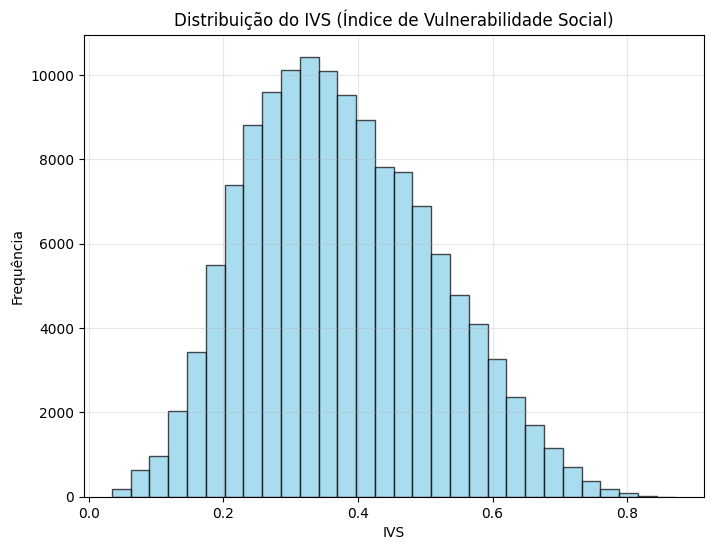

In [64]:
# Distribuição do IVS
plt.figure(figsize=(8, 6))
plt.hist(ivs_filtrado['ivs'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuição do IVS (Índice de Vulnerabilidade Social)')
plt.xlabel('IVS')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()


A distribuição do IVS apresenta características importantes para nossa análise de demanda por serviços de saúde. Observamos uma distribuição unimodal com formato aproximadamente normal, mas com leve assimetria à direita, indicando que a maioria dos territórios possui vulnerabilidade social moderada (concentração entre 0.2 e 0.5). O pico da distribuição ocorre entre 0.35 e 0.40, sugerindo que este é o nível típico de vulnerabilidade social nos territórios analisados. A presença de uma cauda longa à direita indica a existência de territórios com alta vulnerabilidade social (IVS > 0.7), que provavelmente apresentam maior demanda por serviços de atenção primária à saúde. Por outro lado, a baixa frequência de valores muito baixos (IVS < 0.1) sugere que poucos territórios possuem baixíssima vulnerabilidade social. Esta distribuição sugere que a demanda por serviços de saúde pode variar significativamente entre territórios, com aqueles de maior IVS necessitando de maior atenção e recursos na atenção primária.


Após explorar a distribuição do IVS, é igualmente importante analisar o Índice de Desenvolvimento Humano Municipal (IDHM). Este indicador, que varia de 0 a 1, reflete a qualidade de vida, longevidade, educação e renda dos municípios. Compreender sua distribuição nos ajudará a identificar o perfil de desenvolvimento dos territórios e como isso pode se correlacionar com a demanda por serviços de saúde.

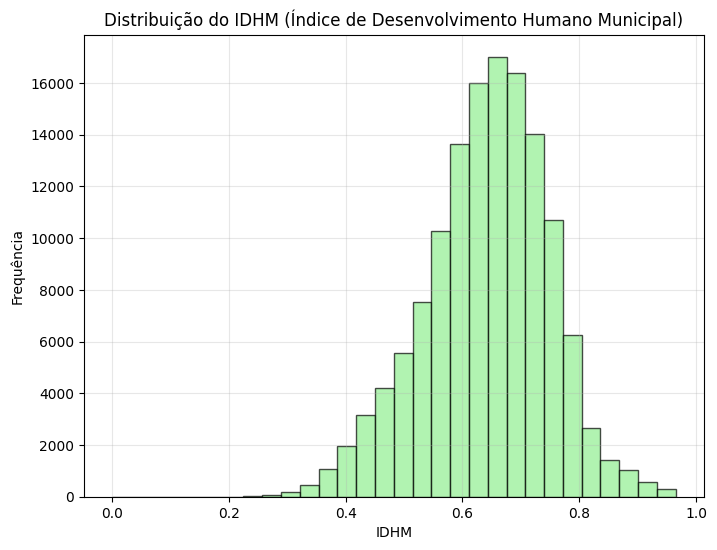

In [65]:
# Distribuição do IDHM
plt.figure(figsize=(8, 6))
plt.hist(ivs_filtrado['idhm'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribuição do IDHM (Índice de Desenvolvimento Humano Municipal)')
plt.xlabel('IDHM')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()


A distribuição do IDHM revela um padrão interessante para nossa análise de demanda por serviços de saúde. Observamos uma distribuição unimodal com formato aproximadamente normal, mas com leve assimetria à esquerda, indicando que a maioria dos municípios possui desenvolvimento humano moderado a alto (concentração entre 0.4 e 0.8). O pico da distribuição ocorre entre 0.65 e 0.70, sugerindo que este é o nível típico de desenvolvimento humano nos territórios analisados. A presença de uma cauda longa à esquerda indica a existência de municípios com baixo desenvolvimento humano (IDHM < 0.4), que provavelmente apresentam maior demanda por serviços de atenção primária à saúde. Por outro lado, a baixa frequência de valores muito altos (IDHM > 0.9) sugere que poucos municípios possuem desenvolvimento humano excepcional. Esta distribuição sugere que a demanda por serviços de saúde pode variar significativamente entre territórios, com aqueles de menor IDHM necessitando de maior atenção e recursos na atenção primária.


### Análise da Relação entre IVS e IDHM

Agora vamos explorar a relação entre os dois indicadores principais: IVS e IDHM. Esta análise é crucial para entender como vulnerabilidade social e desenvolvimento humano se relacionam nos territórios, o que pode fornecer insights importantes para a previsão de demanda por serviços de saúde.


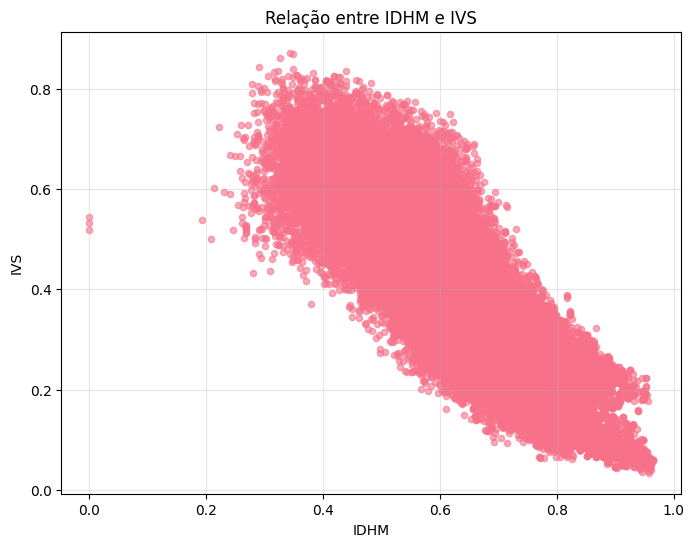

In [66]:
# Relação entre IVS e IDHM
plt.figure(figsize=(8, 6))
plt.scatter(ivs_filtrado['idhm'], ivs_filtrado['ivs'], alpha=0.6, s=20)
plt.xlabel('IDHM')
plt.ylabel('IVS')
plt.title('Relação entre IDHM e IVS')
plt.grid(True, alpha=0.3)
plt.show()


O gráfico de dispersão revela uma forte correlação negativa entre IDHM e IVS, confirmando nossa expectativa teórica de que territórios com maior desenvolvimento humano tendem a apresentar menor vulnerabilidade social. A nuvem de pontos forma um padrão diagonal bem definido, com a maior concentração de territórios situada na faixa de IDHM entre 0.4 e 0.8 e IVS entre 0.2 e 0.6. Esta relação é fundamental para nossa análise de demanda por serviços de saúde, pois sugere que territórios com baixo IDHM e alto IVS (canto superior esquerdo) provavelmente apresentam maior necessidade de atenção primária à saúde. Por outro lado, territórios com alto IDHM e baixo IVS (canto inferior direito) tendem a ter menor demanda por esses serviços. Esta correlação negativa forte indica que podemos usar esses indicadores de forma complementar na modelagem preditiva da demanda.


### Análise Temporal dos Indicadores

Para compreender melhor a evolução dos indicadores ao longo do tempo, vamos analisar como IVS e IDHM se comportaram entre 2000, 2010 e 2020. Esta análise temporal é importante para identificar tendências que podem influenciar a demanda futura por serviços de saúde.


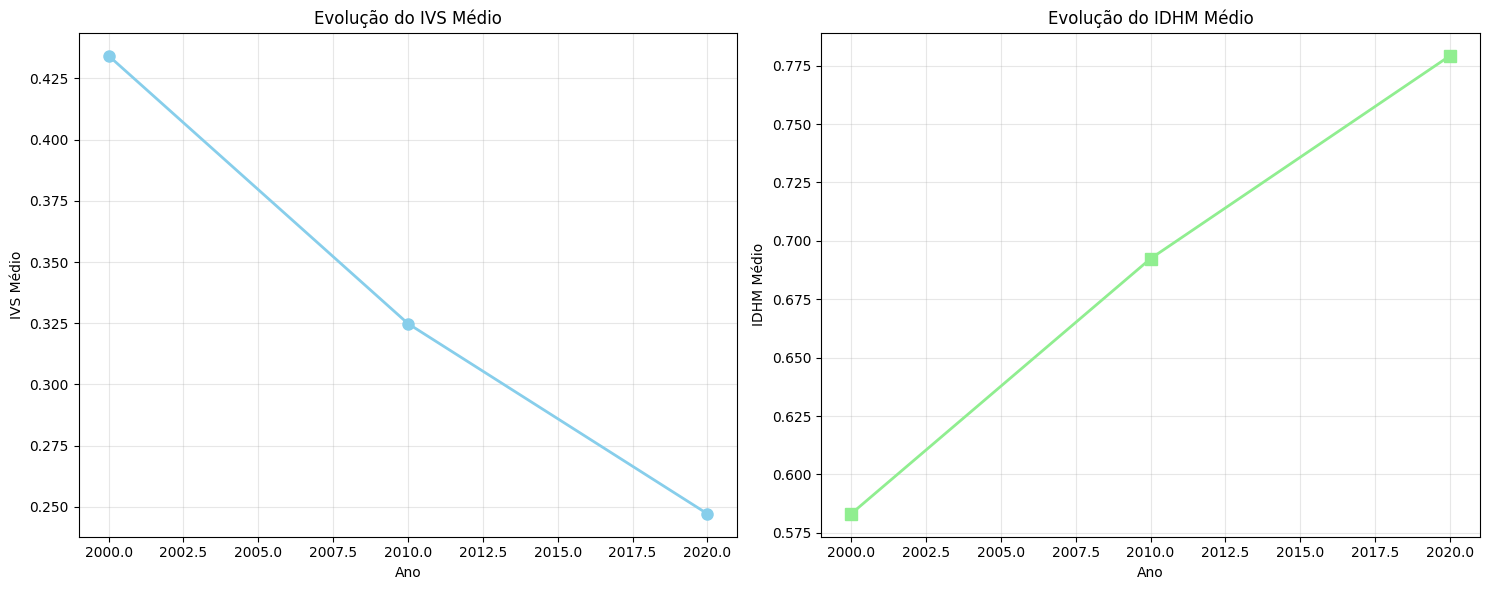

In [79]:
# Evolução temporal do IVS e IDHM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# IVS por ano
ivs_por_ano = ivs_filtrado.groupby('ano')['ivs'].mean()
ax1.plot(ivs_por_ano.index, ivs_por_ano.values, marker='o', linewidth=2, markersize=8, color='skyblue')
ax1.set_title('Evolução do IVS Médio')
ax1.set_xlabel('Ano')
ax1.set_ylabel('IVS Médio')
ax1.grid(True, alpha=0.3)

# IDHM por ano
idhm_por_ano = ivs_filtrado.groupby('ano')['idhm'].mean()
ax2.plot(idhm_por_ano.index, idhm_por_ano.values, marker='s', linewidth=2, markersize=8, color='lightgreen')
ax2.set_title('Evolução do IDHM Médio')
ax2.set_xlabel('Ano')
ax2.set_ylabel('IDHM Médio')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


A evolução temporal dos indicadores revela uma história de transformação social significativa no Brasil entre 2000 e 2020. O IVS apresentou uma redução consistente e acentuada, passando de aproximadamente 0.43 em 2000 para 0.25 em 2020, representando uma melhoria substancial nas condições de vulnerabilidade social dos territórios. Paralelamente, o IDHM mostrou uma trajetória ascendente impressionante, evoluindo de 0.58 para 0.775 no mesmo período, indicando um avanço considerável no desenvolvimento humano municipal. Esta evolução temporal sugere que os territórios brasileiros têm se tornado menos vulneráveis e mais desenvolvidos ao longo do tempo, o que pode ter implicações importantes para a demanda por serviços de saúde. A tendência de melhoria dos indicadores sociais indica que a necessidade de atenção primária à saúde pode ter se modificado ao longo dos anos, com territórios historicamente mais vulneráveis apresentando melhorias que podem ter reduzido sua demanda relativa por serviços de saúde.


### Análise de Correlações entre Indicadores

Para compreender melhor como os diferentes indicadores socioeconômicos se relacionam entre si, vamos analisar a matriz de correlação. Esta análise nos permitirá identificar quais variáveis estão mais fortemente associadas e como elas podem influenciar conjuntamente a demanda por serviços de saúde.


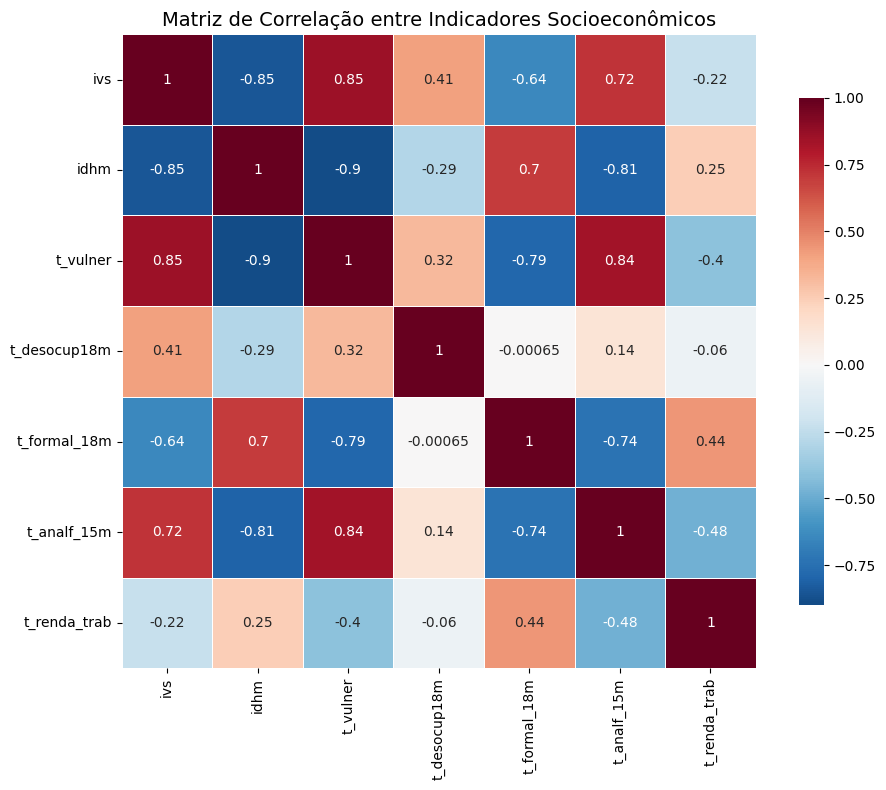

In [68]:
# Matriz de correlação entre indicadores principais
indicadores_correlacao = ['ivs', 'idhm', 't_vulner', 't_desocup18m', 't_formal_18m', 't_analf_15m', 't_renda_trab']
correlacao = ivs_filtrado[indicadores_correlacao].corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Indicadores Socioeconômicos', fontsize=14)
plt.tight_layout()
plt.show()


A matriz de correlação revela um padrão fascinante de interconexões entre os indicadores socioeconômicos, tecendo uma narrativa complexa sobre as condições de vida nos territórios brasileiros. A relação mais evidente e crucial para nossa análise é a forte correlação negativa entre IVS e IDHM (-0.85), confirmando que onde o desenvolvimento humano é alto, a vulnerabilidade social tende a ser baixa, e vice-versa. Esta relação é a espinha dorsal para entender as necessidades de saúde, pois territórios com alto IVS e baixo IDHM são aqueles que mais provavelmente demandarão atenção primária à saúde devido a condições sociais mais precárias. O IVS caminha de mãos dadas com a taxa de vulnerabilidade (0.85) e a taxa de analfabetismo (0.72), pintando um quadro claro: onde a vulnerabilidade social é alta, é comum encontrar uma população com menor acesso à educação e, portanto, mais suscetível a problemas de saúde. Por outro lado, o IDHM se mostra como um pilar de bem-estar, apresentando correlações negativas muito fortes com a taxa de vulnerabilidade (-0.9) e a taxa de analfabetismo (-0.81), criando um ambiente onde a demanda por serviços de saúde pode ser mais focada em prevenção e manutenção. A taxa de formalização do trabalho também emerge como um fator chave, com correlações negativas moderadas a fortes com IVS e vulnerabilidade, sugerindo que trabalhadores formais têm acesso a melhores condições de vida e, consequentemente, diferentes padrões de demanda por saúde.


### Análise Detalhada das Correlações Mais Significativas

Para aprofundar nossa compreensão das relações entre os indicadores, vamos visualizar as correlações mais significativas através de gráficos de dispersão. Isso nos permitirá observar a natureza e a força dessas associações de forma mais intuitiva, complementando a matriz de correlação numérica.


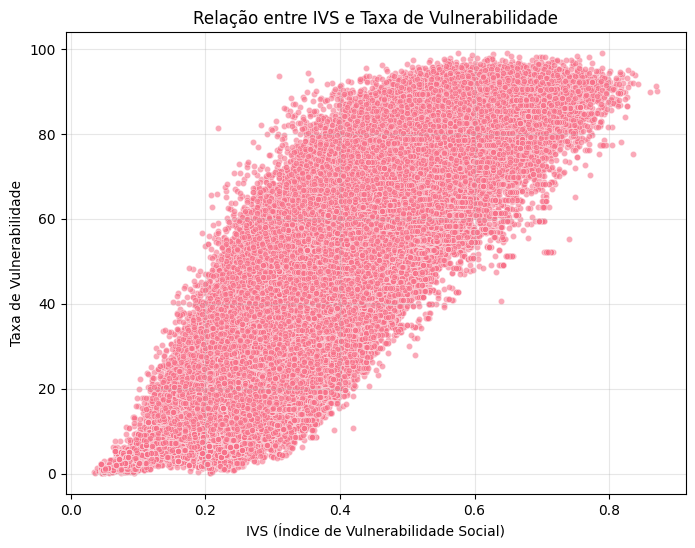

In [69]:
# Correlação entre IVS e t_vulner
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ivs', y='t_vulner', data=ivs_filtrado, alpha=0.6, s=20)
plt.title('Relação entre IVS e Taxa de Vulnerabilidade')
plt.xlabel('IVS (Índice de Vulnerabilidade Social)')
plt.ylabel('Taxa de Vulnerabilidade')
plt.grid(True, alpha=0.3)
plt.show()


O gráfico de dispersão ilustra uma correlação positiva extremamente forte entre o IVS e a Taxa de Vulnerabilidade, com os pontos formando uma faixa densa e quase linear que se estende do canto inferior esquerdo ao superior direito. Essa relação quase perfeita confirma que o IVS não é apenas um indicador abstrato, mas se traduz diretamente em uma maior proporção da população vivendo em condições de vulnerabilidade. Para a previsão de demanda na saúde, isso reforça a ideia de que o IVS é um preditor poderoso: regiões com IVS elevado são aquelas onde a população está mais exposta a riscos sociais e, consequentemente, tem maior necessidade de acesso a serviços de atenção primária à saúde. A consistência dessa relação nos permite confiar no IVS como uma métrica robusta para identificar áreas prioritárias para intervenções em saúde.


Antes de analisar a relação entre IDHM e taxa de vulnerabilidade, é importante esclarecer a diferença entre os indicadores. O IVS (Índice de Vulnerabilidade Social) é um indicador composto que agrega múltiplas dimensões da vulnerabilidade social, incluindo infraestrutura urbana, capital humano e renda e trabalho, resultando em um valor entre 0 e 1. Já a taxa de vulnerabilidade (t_vulner) é um indicador mais específico que mede a proporção da população com renda per capita igual ou inferior a ½ salário mínimo, fornecendo uma medida direta e percentual da população em situação de vulnerabilidade econômica. Embora ambos meçam vulnerabilidade, o IVS oferece uma visão mais abrangente e multidimensional, enquanto a taxa de vulnerabilidade foca especificamente na dimensão econômica.


### Relação entre IDHM e Taxa de Vulnerabilidade

Agora vamos explorar como o desenvolvimento humano se relaciona com a vulnerabilidade econômica. Esta análise é crucial para entender se territórios com maior desenvolvimento humano realmente apresentam menor vulnerabilidade econômica, o que pode influenciar diretamente os padrões de demanda por serviços de saúde.


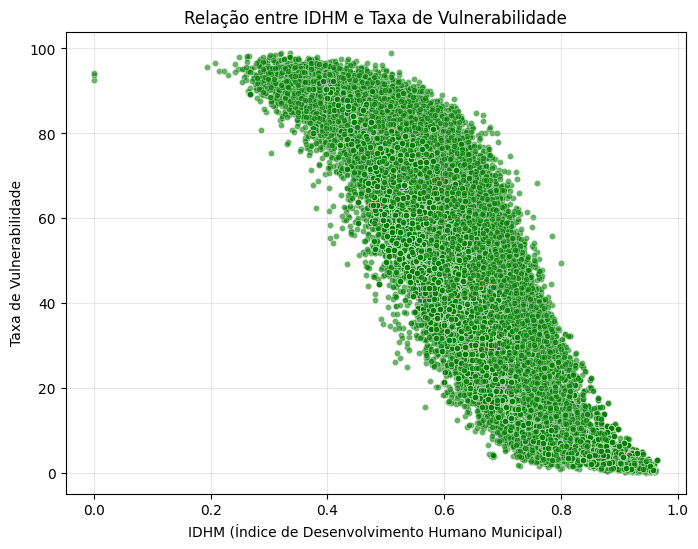

In [70]:
# Correlação entre IDHM e t_vulner
plt.figure(figsize=(8, 6))
sns.scatterplot(x='idhm', y='t_vulner', data=ivs_filtrado, alpha=0.6, s=20, color='green')
plt.title('Relação entre IDHM e Taxa de Vulnerabilidade')
plt.xlabel('IDHM (Índice de Desenvolvimento Humano Municipal)')
plt.ylabel('Taxa de Vulnerabilidade')
plt.grid(True, alpha=0.3)
plt.show()


O gráfico de dispersão entre IDHM e Taxa de Vulnerabilidade revela uma correlação negativa extremamente forte e consistente, confirmando nossa expectativa teórica de que desenvolvimento humano e vulnerabilidade econômica são conceitos antagônicos. A nuvem de pontos forma uma faixa diagonal bem definida, com municípios de baixo IDHM (0.2-0.4) apresentando taxas de vulnerabilidade altas (60-100%), enquanto municípios de alto IDHM (0.8-1.0) mostram taxas de vulnerabilidade baixas (0-20%). Esta relação inversa é fundamental para nossa análise de demanda por serviços de saúde, pois sugere que territórios com baixo desenvolvimento humano e alta vulnerabilidade econômica são aqueles que mais provavelmente necessitarão de atenção primária à saúde. A concentração de pontos na região central da faixa indica que a maioria dos municípios se situa em um espectro de desenvolvimento e vulnerabilidade que segue essa tendência, com poucos outliers extremos. Esta correlação negativa robusta confirma que o IDHM pode ser usado como um indicador complementar ao IVS para identificar áreas prioritárias para intervenções em saúde.

### Relação entre Formalização do Trabalho e Vulnerabilidade

A formalização do trabalho é um indicador crucial para entender as condições socioeconômicas dos territórios. Vamos analisar como a taxa de formalização se relaciona com a vulnerabilidade econômica, pois trabalhadores formais geralmente têm acesso a melhores condições de vida e diferentes padrões de demanda por serviços de saúde.


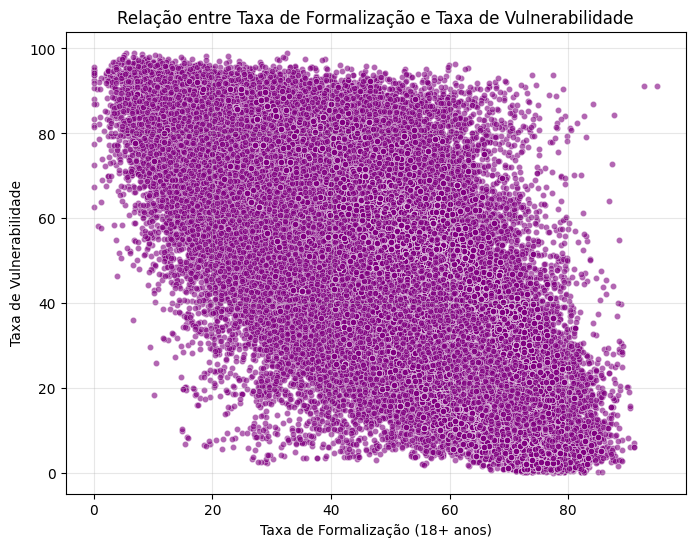

In [72]:
# Correlação entre t_formal_18m e t_vulner
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t_formal_18m', y='t_vulner', data=ivs_filtrado, alpha=0.6, s=20, color='purple')
plt.title('Relação entre Taxa de Formalização e Taxa de Vulnerabilidade')
plt.xlabel('Taxa de Formalização (18+ anos)')
plt.ylabel('Taxa de Vulnerabilidade')
plt.grid(True, alpha=0.3)
plt.show()

O gráfico de dispersão entre taxa de formalização e vulnerabilidade revela uma correlação negativa moderada a forte, confirmando que a formalização do trabalho está associada à redução da vulnerabilidade social. A nuvem de pontos forma uma faixa diagonal que se estende do canto superior esquerdo ao inferior direito, indicando que territórios com alta formalização tendem a apresentar menor vulnerabilidade, enquanto territórios com baixa formalização mostram maior vulnerabilidade. Esta relação inversa é relevante para nossa análise de demanda por serviços de saúde, pois sugere que trabalhadores formais, com acesso a planos de saúde e melhores condições de vida, podem ter padrões de demanda diferentes dos trabalhadores informais. Embora a correlação não seja perfeita, a tendência geral confirma que a formalização do trabalho pode ser um indicador útil para prever a demanda por serviços de saúde, com territórios de maior informalidade provavelmente necessitando de maior atenção primária à saúde.


### Síntese das Descobertas da Análise Exploratória

Nossa análise exploratória revelou padrões consistentes e interconectados entre os indicadores socioeconômicos que são fundamentais para compreender a demanda por serviços de saúde. As correlações fortes entre IVS, IDHM, taxa de vulnerabilidade e formalização do trabalho formam um sistema de indicadores que pode ser usado para identificar territórios prioritários para intervenções em saúde. A evolução temporal mostrou melhorias significativas nos indicadores entre 2000 e 2020, sugerindo que a demanda por serviços de saúde pode ter se modificado ao longo do tempo. Com base nessas descobertas, podemos agora avançar para análises mais específicas que nos ajudarão a desenvolver um modelo preditivo robusto para a demanda por serviços de atenção primária à saúde.


In [73]:
# Identificar territórios com padrões extremos
print("Análise de territórios com padrões atípicos:")
print(f"Total de territórios na base: {len(ivs_filtrado)}")

# Territórios com alto IDHM e alta vulnerabilidade
casos_atipicos = ivs_filtrado[
    (ivs_filtrado['idhm'] > 0.7) & (ivs_filtrado['t_vulner'] > 50)
]
print(f"Territórios com alto IDHM (>0.7) e alta vulnerabilidade (>50%): {len(casos_atipicos)}")

# Territórios com baixo IVS e alta vulnerabilidade
casos_atipicos2 = ivs_filtrado[
    (ivs_filtrado['ivs'] < 0.3) & (ivs_filtrado['t_vulner'] > 50)
]
print(f"Territórios com baixo IVS (<0.3) e alta vulnerabilidade (>50%): {len(casos_atipicos2)}")


Análise de territórios com padrões atípicos:
Total de territórios na base: 134556
Territórios com alto IDHM (>0.7) e alta vulnerabilidade (>50%): 510
Territórios com baixo IVS (<0.3) e alta vulnerabilidade (>50%): 1490


Os resultados revelam padrões interessantes e potencialmente importantes para nossa análise de demanda por serviços de saúde. Dos 134.556 territórios analisados, identificamos 510 casos atípicos de territórios com alto IDHM (>0.7) mas alta vulnerabilidade (>50%), representando aproximadamente 0.4% da amostra. Este é um padrão particularmente intrigante, pois sugere que mesmo em territórios com bom desenvolvimento humano, uma parcela significativa da população ainda vive em condições de vulnerabilidade econômica. Esses territórios podem representar casos de desigualdade social extrema, onde o desenvolvimento humano médio mascara disparidades internas significativas. Por outro lado, identificamos 1.490 territórios com baixo IVS (<0.3) mas alta vulnerabilidade (>50%), representando cerca de 1.1% da amostra. Este padrão sugere que o IVS pode não capturar completamente a vulnerabilidade econômica em alguns contextos, possivelmente devido a fatores locais específicos ou limitações metodológicas do indicador. Ambos os casos atípicos são importantes para nossa análise de demanda por serviços de saúde, pois podem representar territórios com necessidades especiais que não são adequadamente capturadas pelos indicadores principais.
